In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

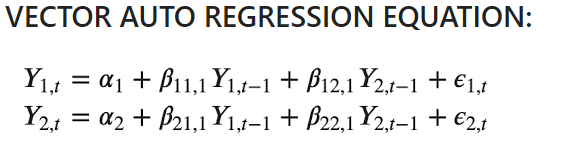

In [5]:

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
macro_data = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(macro_data.shape)  # (123, 8)
macro_data.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


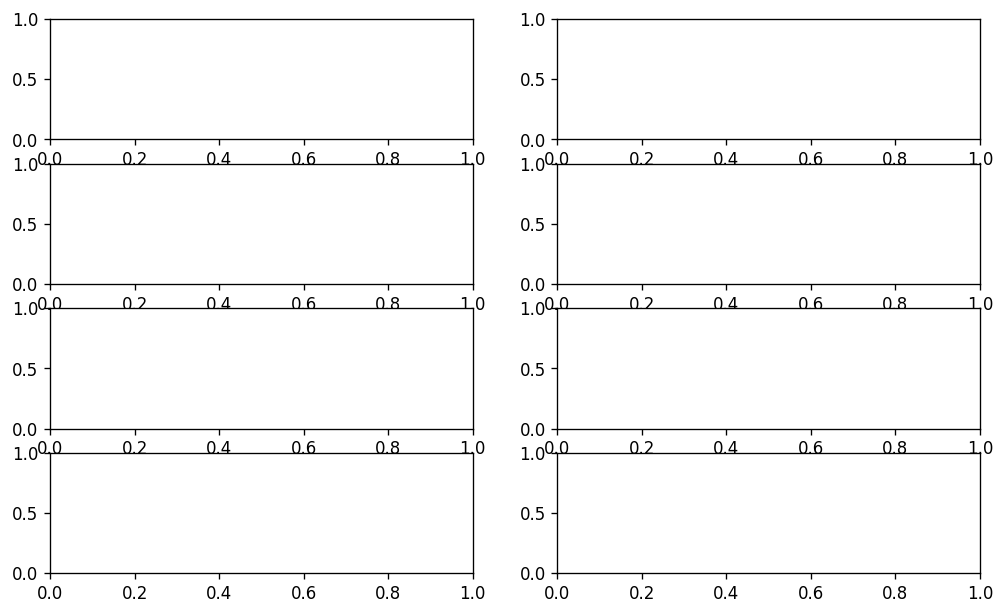

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))

In [8]:
axes.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

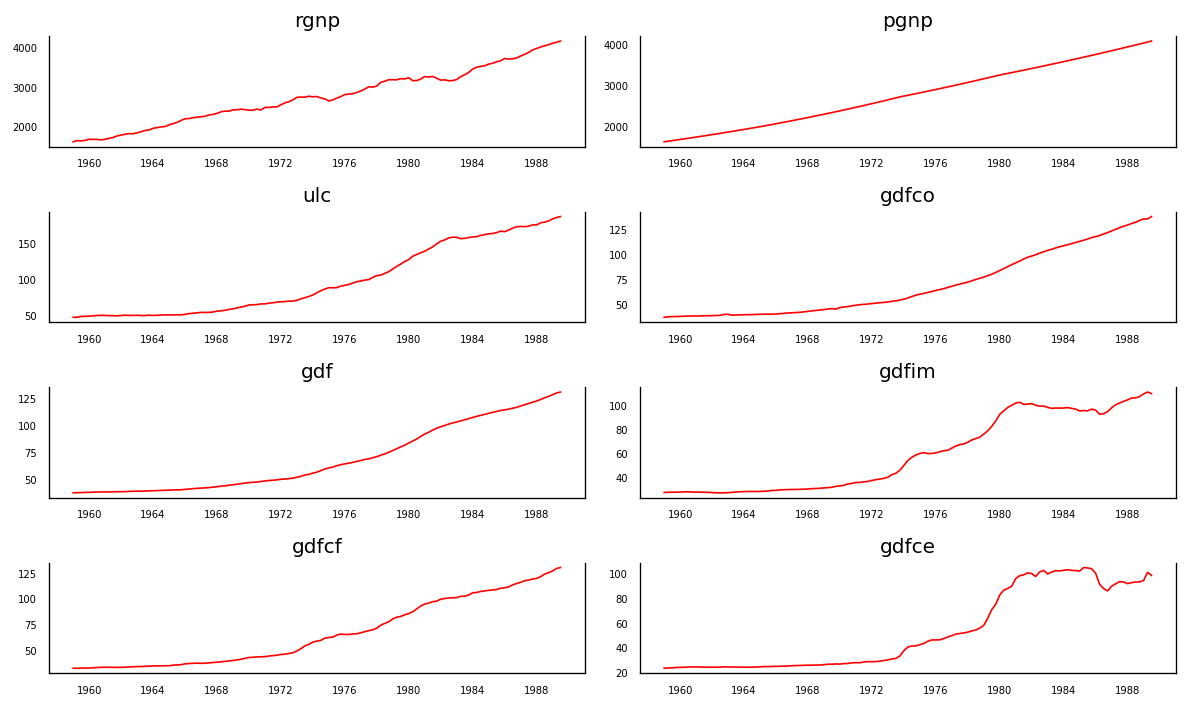

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [20]:
macro_data['rgnp']

date
1959-01-01    1606.4
1959-04-01    1637.0
1959-07-01    1629.5
1959-10-01    1643.4
1960-01-01    1671.6
               ...  
1988-07-01    4042.7
1988-10-01    4069.4
1989-01-01    4106.8
1989-04-01    4132.5
1989-07-01    4162.9
Name: rgnp, Length: 123, dtype: float64

In [ ]:
macro_data['rgnp'].diff() # y(t) = y(t)-y(t-1)

date
1959-01-01     NaN
1959-04-01    30.6
1959-07-01    -7.5
1959-10-01    13.9
1960-01-01    28.2
              ... 
1988-07-01    32.0
1988-10-01    26.7
1989-01-01    37.4
1989-04-01    25.7
1989-07-01    30.4
Name: rgnp, Length: 123, dtype: float64

In [19]:
macro_data['rgnp'].diff()[1:]

date
1959-04-01    30.6
1959-07-01    -7.5
1959-10-01    13.9
1960-01-01    28.2
1960-04-01    -4.8
              ... 
1988-07-01    32.0
1988-10-01    26.7
1989-01-01    37.4
1989-04-01    25.7
1989-07-01    30.4
Name: rgnp, Length: 122, dtype: float64

In [11]:
ad_fuller_result_1 = adfuller(macro_data['rgnp'].diff()[1:])

print('realgdp')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

realgdp
ADF Statistic: -5.427594381007334
p-value: 2.9633019848468996e-06

---------------------



In [12]:
ad_fuller_result_2 = adfuller(macro_data['ulc'].diff()[1:])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realcons
ADF Statistic: -3.5760804731509115
p-value: 0.006235131830238156


Granger causality is a statistical test used to determine if one time series can be used to forecast another time series. In other words, it checks if the past values of one series (X) can help predict the future values of another series (Y).
How to interpret the results?
The grangercausalitytests function returns a dictionary with the test results. The keys of the dictionary are the lag values, and the values are tuples containing the test statistic, p-value, and other relevant information.
Here's a breakdown of the results:
Test Statistic: The value of the test statistic, which is used to determine the significance of the result.
p-value: The probability of observing the test statistic under the null hypothesis that X does not Granger-cause Y. A low p-value (typically < 0.05) indicates that the null hypothesis can be rejected, and X is likely to Grange

In [ ]:

print('rgnp causes ulc?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['ulc', 'rgnp']], 4)

print('\nulc causes rgnp?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['rgnp', 'ulc']], 4)
     

rgnp causes ulc?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=22.9444 , p=0.0000  , df=1
likelihood ratio test: chi2=21.0242 , p=0.0000  , df=1
parameter F test:         F=22.3802 , p=0.0000  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=16.1029 , p=0.0003  , df=2
likelihood ratio test: chi2=15.1179 , p=0.0005  , df=2
parameter F test:         F=7.7188  , p=0.0007  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=23.9675 , p=0.0000  , df=3
likelihood ratio test: chi2=21.8515 , p=0.0001  , df=3
parameter F test:         F=7.5231  , p=0.0001  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F

In [14]:
macro_data = macro_data[['ulc','rgnp']]
print(macro_data.shape)

(123, 2)


In [15]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [16]:
print(test_df.shape)

(12, 2)


In [21]:
model = VAR(train_df.diff()[1:])

In [23]:
model

model.select_order() is a method in the VAR class from the statsmodels library that selects the optimal order (i.e., the number of lags) for the VAR model based on various information criteria.
Parameters:
maxlags: The maximum number of lags to consider.
Information Criteria:
The select_order() method uses the following information criteria to select the optimal order:
AIC (Akaike Information Criterion): A measure of the relative quality of a model for a given set of data.
BIC (Bayesian Information Criterion): A measure of the relative quality of a model for a given set of data, with a penalty term for model complexity.
HQIC (Hannan-Quinn Information Criterion): A measure of the relative quality of a model for a given set of data, with a penalty term for model complexity.

In [24]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        6.778       6.834       878.3       6.800
1        5.988      6.154*       398.5       6.055
2        5.942       6.220       380.9       6.054
3        5.933       6.322       377.4       6.090
4       5.793*       6.293      328.5*      5.995*
5        5.873       6.484       356.3       6.120
6        5.828       6.550       341.1       6.119
7        5.894       6.727       365.0       6.230
8        5.890       6.835       364.8       6.271
9        5.942       6.998       385.8       6.368
10       5.930       7.097       382.9       6.401
11       5.913       7.191       378.5       6.428
12       5.885       7.274       370.7       6.445
13       5.925       7.424       388.6       6.529
14       5.882       7.493       376.0       6.532
15       5.950       7.672       406.9       6.644
16       5.933       7.766     

A VARMAX (Vector Autoregression Moving Average with eXogenous variables) model is an extension of the VAR model that also includes moving average (MA) terms. This allows the model to capture more complex patterns in the data.
Parameters:
train_df: The training data.
order=(4,0): The order of the VAR and MA components, respectively. In this case, the VAR component has an order of 4, and the MA component has an order of 0 (i.e., no MA component).
enforce_stationarity=True: This parameter ensures that the model imposes stationarity on the data. Stationarity means that the statistical properties of the data, such as the mean and variance, remain constant over time.
Fitting the Model:
The fit() method is used to estimate the parameters of the VARMAX model. The disp=False parameter suppresses the output of the estimation results.

In [ ]:

var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:        ['ulc', 'rgnp']   No. Observations:                  111
Model:                         VAR(4)   Log Likelihood              -11821.114
                          + intercept   AIC                          23684.229
Date:                Wed, 04 Dec 2024   BIC                          23741.129
Time:                        17:46:06   HQIC                         23707.312
Sample:                    01-01-1959                                         
                         - 07-01-1986                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):          37.55, 106.10   Jarque-Bera (JB):         22.87, 13.69
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.66, 0.28   Skew:                      0.66, -0.86
Prob(H) (two-sided):            0.13,

In [27]:
len(train_df)

111

In [ ]:
n_forecast = 12

In [28]:
len(train_df) + n_forecast-1

122

In [ ]:

predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [29]:
predict

In [30]:
predictions

,ulc,rgnp
1986-10-01,166.316089,3568.062770
1987-01-01,243.921965,3756.787171
1987-04-01,48.789563,3553.865356
1987-07-01,268.913251,3862.222143
1987-10-01,148.263429,3478.424823
1988-01-01,169.199236,3768.988589
1988-04-01,155.427424,3634.323828
1988-07-01,209.632123,3729.604171
1988-10-01,142.708964,3566.320508
1989-01-01,196.710826,3771.119505


In [31]:
predictions.columns=['ulc_predicted','rgnp_predicted']
predictions

,ulc_predicted,rgnp_predicted
1986-10-01,166.316089,3568.062770
1987-01-01,243.921965,3756.787171
1987-04-01,48.789563,3553.865356
1987-07-01,268.913251,3862.222143
1987-10-01,148.263429,3478.424823
1988-01-01,169.199236,3768.988589
1988-04-01,155.427424,3634.323828
1988-07-01,209.632123,3729.604171
1988-10-01,142.708964,3566.320508
1989-01-01,196.710826,3771.119505


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [33]:
test_vs_pred

,ulc,rgnp,ulc_predicted,rgnp_predicted
1986-10-01,173.2,3733.6,166.316089,3568.062770
1987-01-01,173.6,3783.0,243.921965,3756.787171
1987-04-01,173.4,3823.5,48.789563,3553.865356
1987-07-01,173.9,3872.8,268.913251,3862.222143
1987-10-01,175.8,3935.6,148.263429,3478.424823
1988-01-01,175.7,3974.8,169.199236,3768.988589
1988-04-01,178.7,4010.7,155.427424,3634.323828
1988-07-01,179.6,4042.7,209.632123,3729.604171
1988-10-01,181.3,4069.4,142.708964,3566.320508
1989-01-01,184.1,4106.8,196.710826,3771.119505


<Axes: >

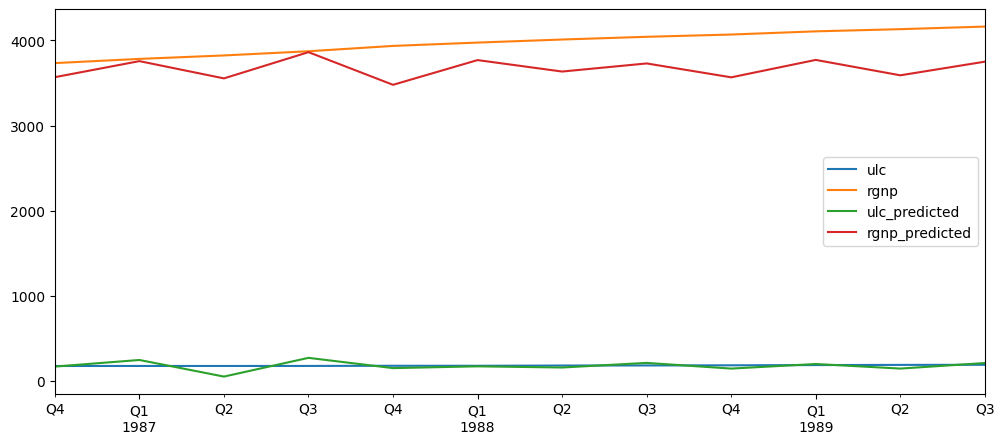

In [34]:

test_vs_pred.plot(figsize=(12,5))

In [35]:

from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['ulc_predicted'],test_df['ulc']))
print('Mean value of ULC is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['ulc']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['rgnp_predicted'],test_df['rgnp']))
print('Mean value of RGNP is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['rgnp']),rmse_rgnp))

Mean value of ULC is : 178.56666666666666. Root Mean Squared Error is :54.56636780280896
Mean value of RGNP is : 3970.6916666666666. Root Mean Squared Error is :344.26451991808955
